# Introducing ensemble methods

## Lecture 7

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

In [2]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

 Ensemble methods are a type of machine learning technique that combine the predictions of multiple models to make more accurate predictions than any individual model could. These methods are particularly useful in situations where the individual models have high variance or make strong, complex predictions. There are several types of ensemble methods, including boosting, bagging, and bootstrapped ensembles.

One popular type of ensemble method is boosting, in which a series of weak models are trained sequentially, with each model attempting to correct the mistakes of the previous model. The final prediction is made by combining the predictions of all the models in the ensemble. Boosting algorithms include AdaBoost and Gradient Boosting.

Another type of ensemble method is bagging, in which a group of models are trained independently on different random subsets of the training data. The final prediction is made by averaging the predictions of all the models in the ensemble. Bagging algorithms include Random Forests and Extra Trees. Ensemble methods have been successful in a wide range of applications, including image classification and speech recognition.

### Voting Classifier

Combines multiple classifiers and uses a voting scheme to make predictions. The voting scheme can be either **hard** or **soft**, depending on how the final prediction is made.

In a hard voting scheme, the final prediction is the mode of the predictions of the individual classifiers.
In other words, each classifier casts a "vote" for its predicted class, and the class that receives the most votes is chosen as the final prediction.
This is equivalent to a simple majority vote.

In a soft voting scheme, the final prediction is the class with the highest probability of being predicted by the individual classifiers.
In other words, each classifier produces a set of probabilities for each class, and the probabilities are averaged across all the classifiers.
The class with the highest average probability is chosen as the final prediction.

In [5]:
# Load the Iris dataset and split it into training and testing sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2)

# Define the base classifiers
clf1 = LogisticRegression(random_state=10, solver='lbfgs', max_iter=1000)
clf2 = DecisionTreeClassifier(random_state=42)

# Define the VotingClassifier with hard voting
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2)], voting='soft')

# Train the LogisticRegression and DecisionTree
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# Evaluate the LogisticRegression and RandomForestClassifier on the testing set
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

# Evaluate the VotingClassifier on the testing set
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy logistic regression: {accuracy1:.3f}')
print(f'Accuracy decision tree: {accuracy2:.3f}')
print(f'Accuracy voting classifier: {accuracy:.3f}')

Accuracy logistic regression: 0.947
Accuracy decision tree: 0.960
Accuracy voting classifier: 0.960


## Week and strong learners

A weak learner is a model that performs only slightly better than random guessing.
For example, a decision tree with only one split or a linear regression model with a low degree polynomial can be considered weak learners.
Although weak learners may not perform well individually, they can be combined in various ways to create a strong learner.

A strong learner, on the other hand, is a model that can make accurate predictions on a given task with high confidence.
A strong learner can be created by combining multiple weak learners using ensemble methods such as boosting, bagging, and stacking.

In boosting, weak learners are trained sequentially, with each subsequent learner focused on the samples that the previous learner got wrong.
By doing so, boosting can increase the accuracy of the model and create a strong learner from a collection of weak learners.
Examples of boosting algorithms include AdaBoost and Gradient Boosting.

In bagging, weak learners are trained independently on different subsets of the data, and their predictions are aggregated using a voting scheme or an average.
Bagging can reduce the variance of the model and create a strong learner from a collection of unstable weak learners.
Examples of bagging algorithms include Bagging classifier (today) Random Forest and Extra Trees (will be covered next lecture).

## Bootstrap Aggregation (Bagging)

- Bagging stands for Bootstrap Aggregation
- It is an ensemble technique that combines multiple models trained on different subsets of the training data
- Bagging reduces overfitting by aggregating the results of many base models trained on different subsets of the training data, leading to a more generalized model.
- In bagging, each model is trained independently, and the final prediction is the average (in regression) or majority vote (in classification) of the predictions of the individual models.
- One of the most popular bagging algorithms is the Random Forest algorithm (will be covered in the next lecture), which builds a collection of decision trees using random subsets of the features and training samples.

## Bootstrap

Bootstrap works by creating multiple samples from the original data by randomly sampling with replacement.
In each bootstrap sample, some data points are selected multiple times, while others are not selected at all.
This results in a new dataset that has the same size as the original dataset but with some variability in the data points.

By creating multiple bootstrap samples and training the model on each sample, we can estimate the variability of the model's performance and parameter estimates, and compute confidence intervals for the model's predictions.
This is particularly useful when the sample size is small, or when the distribution of the data is unknown or complex.

## Classifying Breast Cancer with Bagging

Here we will classify breast cancer based on a dataset of patient information.
The dataset contains information on patient features such as their age, tumor size, and number of positive lymph nodes, as well as whether the patient's cancer has recurred.
We train a classifier to predict whether a new patient's cancer is likely to recur.

In [6]:
# Load and prepare the dataset

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.4, random_state=42)

In [7]:
import numpy as np
np.shape(X_train)

(341, 30)

In [8]:
#  Train the Bagging Classifier

# Create an instance of the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Create an instance of the BaggingClassifier
bag_clf = BaggingClassifier(estimator=tree_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

# Train the BaggingClassifier on the training set
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [9]:
# Evaluate the Classifier
# Make predictions on the testing set
y_pred = bag_clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the confusion matrix of the classifier
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Evaluate the classification report of the classifier
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.9517543859649122
Confusion matrix:
 [[ 74   6]
 [  5 143]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        80
           1       0.96      0.97      0.96       148

    accuracy                           0.95       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228



In [10]:
# Tune the Hyperparameters

# Create an instance of the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Create an instance of the BaggingClassifier with different hyperparameters
bag_clf1 = BaggingClassifier(estimator=tree_clf, n_estimators=100, max_samples=10, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf2 = BaggingClassifier(estimator=tree_clf, n_estimators=200, max_samples=50, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf3 = BaggingClassifier(estimator=tree_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf4 = BaggingClassifier(estimator=tree_clf, n_estimators=1000, max_samples=200, bootstrap=True, n_jobs=-1, random_state=42)

# Train each BaggingClassifier on the training set
bag_clf1.fit(X_train, y_train)
bag_clf2.fit(X_train, y_train)
bag_clf3.fit(X_train, y_train)
bag_clf4.fit(X_train, y_train)

# Evaluate the performance of each BaggingClassifier on the testing set
print("Bagging Classifier 1:")
print("Accuracy:", bag_clf1.score(X_test, y_test))
print("Bagging Classifier 2:")
print("Accuracy:", bag_clf2.score(X_test, y_test))
print("Bagging Classifier 3:")
print("Accuracy:", bag_clf3.score(X_test, y_test))
print("Bagging Classifier 4:")
print("Accuracy:", bag_clf4.score(X_test, y_test))

Bagging Classifier 1:
Accuracy: 0.9605263157894737
Bagging Classifier 2:
Accuracy: 0.9429824561403509
Bagging Classifier 3:
Accuracy: 0.9517543859649122
Bagging Classifier 4:
Accuracy: 0.9517543859649122


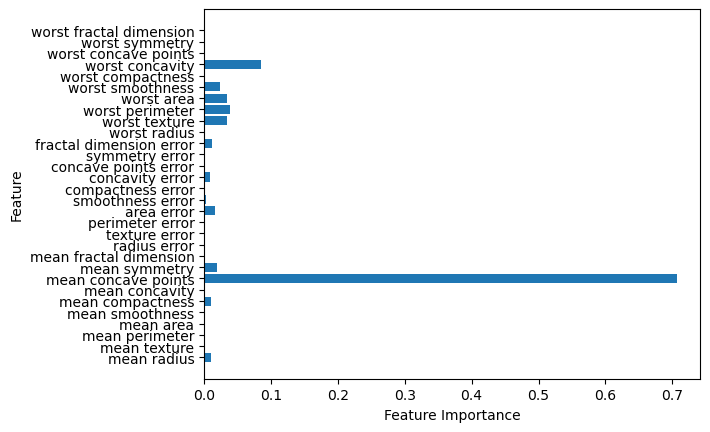

In [11]:
# Visualize the Feature importances
tree_clf.fit(X_train, y_train)

# Plot the feature importances
feature_importances = tree_clf.feature_importances_
plt.barh(range(data.data.shape[1]), feature_importances)
plt.yticks(range(data.data.shape[1]), data.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()